## Netflix Prize Dataset Analysis

#### Data Importing and Loading

In [4]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
netflix_dataset = pd.read_csv('/content/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
# Check the data types
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [5]:
# cehck shape of the dataset
netflix_dataset.shape

(24058263, 2)

#### Missing Values and Understanding Movie Count


In [6]:
# In this dataset, rows with 'NaN' in the 'Rating' column indicate movie IDs
# Counting the number of 'NaN' values to determine the number of movies
movie_count=netflix_dataset['Rating'].isnull().sum()
movie_count

4499

#### Counting Unique Customers in the Dataset

In [38]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()
customer_count

475257

#### Counting Unique Customers Without Movie IDs

In [39]:
# Subtracting the number of movies (rows with NaN values in 'Rating') to get the actual count of unique customers
customer_count=customer_count-movie_count
customer_count

np.int64(470758)

#### Calculating the Total Number of Ratings Given by Customers


In [40]:
# counting non-null values in the 'Rating' column
rating_count = netflix_dataset['Rating'].count()
rating_count

np.int64(24053764)

In [41]:
# Using value_counts() to get the frequency of each star rating
stars = netflix_dataset['Rating'].value_counts().sort_index(ascending=False)
stars

,count
Rating,
5.0,5506583
4.0,8085741
3.0,6904181
2.0,2439073
1.0,1118186


#### Visualizing the Distribution of Star Ratings

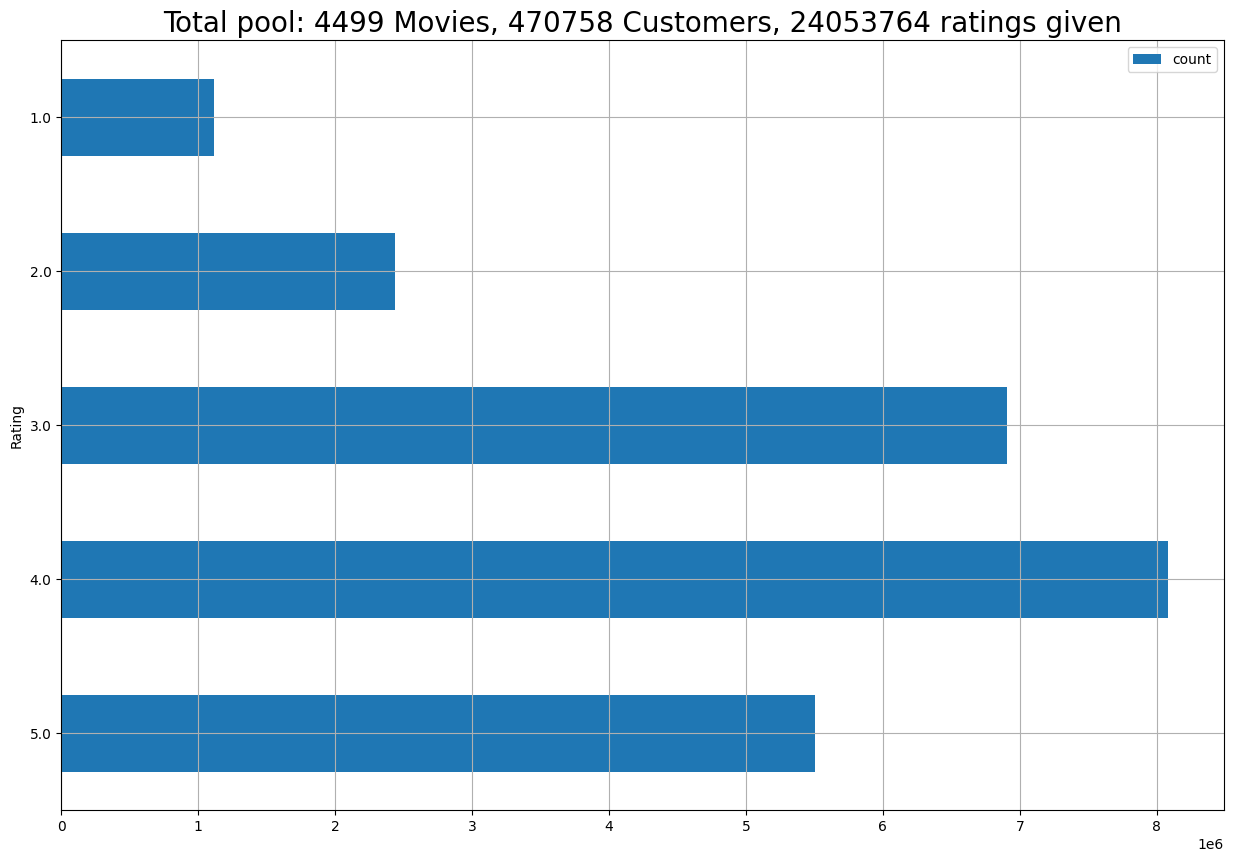

In [ ]:
stars.plot(kind='barh', legend=True, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

#### Handling Missing Values and Adding Movie ID Column

In [6]:
# Filtering the DataFrame to keep only the rows where 'Rating' is NaN
df_nan = netflix_dataset[netflix_dataset['Rating'].isnull()].reset_index() #now we will reset the index as the column
df_nan

,index,Cust_Id,Rating
0,0,1:,NaN
1,548,2:,NaN
2,694,3:,NaN
3,2707,4:,NaN
4,2850,5:,NaN
...,...,...,...
4494,24046714,4495:,NaN
4495,24047329,4496:,NaN
4496,24056849,4497:,NaN
4497,24057564,4498:,NaN


### Adding a new 'Movie ID' column initialized with NaN values


In [7]:
netflix_dataset['Movie_Id'] = np.nan

In [8]:
movie_id=1
for i, j in zip(df_nan['index'][:-1], df_nan['index'][1:]):
  # For each pair of indices (i, j), assign the current movie_id to the 'Movie_Id' column
  netflix_dataset.loc[i:j, 'Movie_Id'] = movie_id
  movie_id+=1
# After the loop, assign the final movie_id to all rows after the last index 'j'
netflix_dataset.loc[j:, 'Movie_Id'] = movie_id



In [9]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1.0
1,1488844,3.0,1.0
2,822109,5.0,1.0
3,885013,4.0,1.0
4,30878,4.0,1.0
...,...,...,...
24058258,2591364,2.0,4499.0
24058259,1791000,2.0,4499.0
24058260,512536,5.0,4499.0
24058261,988963,3.0,4499.0


In [10]:
# Dropping rows with NaN values in the dataset
netflix_dataset.dropna(inplace = True)

# Ensuring the 'Cust_Id' column is of integer type
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1.0
2,822109,5.0,1.0
3,885013,4.0,1.0
4,30878,4.0,1.0
5,823519,3.0,1.0
...,...,...,...
24058258,2591364,2.0,4499.0
24058259,1791000,2.0,4499.0
24058260,512536,5.0,4499.0
24058261,988963,3.0,4499.0


#### Finding the Most Popular Movies

In [13]:
most_rated_movies = netflix_dataset['Movie_Id'].value_counts().reset_index()
top_rated_movies = most_rated_movies.sort_values(by='count', ascending=False).head(10)
print("Top 10 Most Rated Movies:\n")
print(top_rated_movies)

Top 10 Most Rated Movies:

   Movie_Id   count
0    1905.0  193941
1    2152.0  162597
2    3860.0  160454
3    4432.0  156183
4     571.0  154832
5    3938.0  153996
6    4306.0  151292
7    2452.0  149866
8    1962.0  145519
9    3962.0  140979


#### Analyzing Ratings : The highest and lowest-rated movies

In [14]:
movies_rating = netflix_dataset.groupby('Movie_Id')['Rating'].mean().reset_index().sort_values('Rating',ascending=False)

highest_rated_movies = movies_rating.head(10)
print("Top 10 Highest Rated Movies:\n")
print(highest_rated_movies)

print("")

# Analyzing the lowest-rated movies
lowest_rated_movies = movies_rating.sort_values(by='Rating').head(10)
print("Top 10 Lowest Rated Movies:\n")
print(lowest_rated_movies)

Top 10 Highest Rated Movies:

      Movie_Id    Rating
3455    3456.0  4.670989
3032    3033.0  4.586364
2101    2102.0  4.581296
4237    4238.0  4.554434
12        13.0  4.552000
3443    3444.0  4.516007
4426    4427.0  4.473692
1475    1476.0  4.469693
2018    2019.0  4.467500
1417    1418.0  4.464824

Top 10 Lowest Rated Movies:

      Movie_Id    Rating
514      515.0  1.287879
3574    3575.0  1.400000
2425    2426.0  1.452381
4201    4202.0  1.487395
1226    1227.0  1.496241
1568    1569.0  1.497758
624      625.0  1.505034
1724    1725.0  1.522137
3843    3844.0  1.600000
1790    1791.0  1.615385


#### Counting Customer,Movie Ratings and Setting Benchmark


In [11]:
dataset_movie_summary = netflix_dataset['Movie_Id'].value_counts()

# Calculating the benchmark for movie ratings using the 60th percentile
movie_benchmark = round(dataset_movie_summary.quantile(0.6), 0)
movie_benchmark # we are creating benchmark that atleast a movie should have a rating of 908 , so that it can be considered for recommendation

908.0

In [12]:
# Grouping and counting ratings for each customer
dataset_cust_summary = netflix_dataset['Cust_Id'].value_counts()

# Calculating the benchmark for customer activity using the 60th percentile
cust_benchmark = round(dataset_cust_summary.quantile(0.6), 0)
cust_benchmark

36.0

#### Filtering Out Low-Rated Movies and Inactive Customers

In [13]:
#Filter out unpopular movies and inactive customers.
# Movies and customers above benchmark
keep_movie_list = dataset_movie_summary[dataset_movie_summary >= movie_benchmark].index
keep_cust_list = dataset_cust_summary[dataset_cust_summary >= cust_benchmark].index

#### Filtering the Dataset Based on Benchmarks

In [14]:
# Removing movies that fall below the movie benchmark
netflix_dataset=netflix_dataset[netflix_dataset['Movie_Id'].isin(keep_movie_list)]

# Removing customers that fall below the customer benchmark
netflix_dataset=netflix_dataset[netflix_dataset['Cust_Id'].isin(keep_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (19695836, 3)


In [15]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3.0
697,1331154,4.0,3.0
698,2632461,3.0,3.0
699,44937,5.0,3.0
700,656399,4.0,3.0
...,...,...,...
24056842,1055714,5.0,4496.0
24056843,2643029,4.0,4496.0
24056844,267802,4.0,4496.0
24056845,1559566,3.0,4496.0


In [16]:
df_title = pd.read_csv("/content/movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
df_title.set_index('Movie_Id', inplace=True)

In [17]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


#### Model Building Preparation

In [2]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2610388 sha256=26c147fcb2991cbb9aef0e6a857f3ab1206b97ac6f351d7bc6edbc0b4f4a15d2
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [2]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD,accuracy
from surprise.model_selection import cross_validate

In [21]:
import joblib
from surprise.model_selection import train_test_split

# Preparing the dataset for the SVD algorithm using the Surprise library
reader = Reader()

data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']][:9000000], reader)

# 80% train, 20% test
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initializing the SVD model for collaborative filtering
model = SVD()

# Train on trainset
print("Training SVD model on 80% of data...")
model.fit(trainset)


# 5️⃣ Predict on testset
predictions = model.test(testset)

# 6️⃣ Evaluate model performance
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"Test RMSE: {rmse}, Test MAE: {mae}")



Training SVD model on 80% of data...
RMSE: 0.8899
MAE:  0.6916
Test RMSE: 0.889946859740941, Test MAE: 0.6916233927401476


In [22]:
save_path = 'svd_model.pkl'
joblib.dump(model, save_path)
print(f"Model saved to {save_path}")

Model saved to svd_model.pkl


#### Generating Recommendations for a Specific User

In [29]:
def recommend_movies(model, df_title, df_ratings, user_id, top_n=10):
    # Copy titles and reset index to have Movie_Id column
    user_movies = df_title.copy().reset_index()

    # Filter out movies already rated by the user
    rated_movies = df_ratings[df_ratings['Cust_Id'] == user_id]['Movie_Id'].unique()
    user_movies = user_movies[~user_movies['Movie_Id'].isin(rated_movies)]

    # Estimate ratings for each movie for this user
    user_movies['Estimate_Score'] = user_movies['Movie_Id'].apply(lambda x: model.predict(user_id, x).est)

    # Sort by estimated rating and return top N
    top_recommendations = user_movies.sort_values('Estimate_Score', ascending=False).head(top_n)

    return top_recommendations


In [31]:
user_id = 712664
top_recommendations = recommend_movies(model, df_title, netflix_dataset, user_id, top_n=10)
print("Top movie recommendations:")
top_recommendations

Top movie recommendations:


,Movie_Id,Year,Name,Estimate_Score
2101,2102,1994.0,The Simpsons: Season 6,5.000000
1740,1741,1999.0,Cowboy Bebop Remix,5.000000
1276,1277,1988.0,Red Dwarf: Series 3,5.000000
470,471,1931.0,City Lights,5.000000
1657,1658,1986.0,Yes,5.000000
315,316,1999.0,Futurama: Monster Robot Maniac Fun Collection,4.975290
1847,1848,1956.0,Samurai Trilogy 3: Duel at Ganryu Island,4.946825
1707,1708,1936.0,Modern Times,4.942783
1788,1789,1994.0,Cracker: Series 2,4.910239
222,223,2003.0,Chappelle's Show: Season 1,4.895193


**User-Specific Recommendations**
- For Customer ID 712664:
 - Created a filtered dataset excluding movies that were below the popularity benchmark.
 - Estimated ratings for movies not rated by the customer using the trained SVD model.
 - Recommended top movies based on the highest estimated scores.

**Top Recommendations**
1. "The Simpsons: Season 6" - Estimated Score: 5.000
2. "Cowboy Bebop Remix" - Estimated Score: 5.000
3. "Red Dwarf: Series 3" - Estimated Score: 5.000
4. "City Lights" - Estimated Score: 5.000
5. "Yes" - Estimated Score: 5.000
6. "Futurama: Monster Robot Maniac Fun Collection" - Estimated Score: 4.975
7. "Samurai Trilogy 3: Duel at Ganryu Island" - Estimated Score: 4.947
8. "Modern Times" - Estimated Score: 4.943
9. "Cracker: Series 2" - Estimated Score: 4.910
10. "Chappelle's Show: Season 1" - Estimated Score: 4.895